# 10개의 서로다른 의류 class 로 분류

In [79]:
import tensorflow as tf
import matplotlib.pyplot as plt

fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train_sparse),(x_test,y_test_sparse)=fashion_mnist.load_data()
print(x_train.shape,x_test.shape)

from tensorflow.keras.utils import to_categorical, plot_model
y_train=to_categorical(y_train_sparse)
y_test=to_categorical(y_test_sparse)
print(y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(10000, 10)


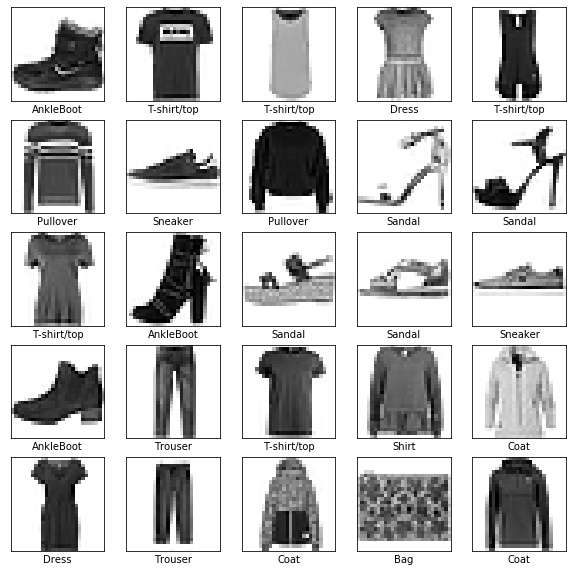

In [80]:
x_train=x_train/255.0
x_test=x_test/255.0

class_names=['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','AnkleBoot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_sparse[i]])
plt.show()

Flatten 했다 -> MLP 라는거

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation,LeakyReLU,PReLU
model=Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(256,activation='elu',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(LeakyReLU())
model.add(Dense(128,activation='selu',kernel_initializer='lecun_normal'))
model.add(PReLU())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 128)               128       
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

Flatten
Dense
Batchnorm -> momentum 0.9 => parameter 가 4개 필요. 256*4 = 1024개 => 그 중 평균과 분산은 trainable하지 않음. 1024/2 = 512개 non-trainable
두번째 batchnorm: 256 개 non -rainable
=> 512 + 256 = 768 개 non-trainable

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation,LeakyReLU,PReLU,BatchNormalization
model=Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(256,activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization(momentum=0.9))
model.add(Dense(128,activation='selu',kernel_initializer='lecun_normal'))
model.add(BatchNormalization(center=False, scale=False))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               256       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 236,426
Trainable params: 235,658
Non-trainable params: 768
______________________________________________

In [5]:
model.compile(loss='categorical_crossentropy',optimizer='nadam', metrics=['accuracy'])
results=model.fit(x_train,y_train, batch_size=32, epochs=10,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 14s 250us/sample - loss: 0.4745 - accuracy: 0.8307 - val_loss: 0.4117 - val_accuracy: 0.8410
Epoch 2/10
54000/54000 [==============================] - 11s 201us/sample - loss: 0.3665 - accuracy: 0.8663 - val_loss: 0.3404 - val_accuracy: 0.8753
Epoch 3/10
54000/54000 [==============================] - 11s 207us/sample - loss: 0.3263 - accuracy: 0.8786 - val_loss: 0.3429 - val_accuracy: 0.8720
Epoch 4/10
54000/54000 [==============================] - 11s 208us/sample - loss: 0.3019 - accuracy: 0.8877 - val_loss: 0.3233 - val_accuracy: 0.8812
Epoch 5/10
54000/54000 [==============================] - 11s 208us/sample - loss: 0.2786 - accuracy: 0.8982 - val_loss: 0.3322 - val_accuracy: 0.8805
Epoch 6/10
54000/54000 [==============================] - 12s 213us/sample - loss: 0.2604 - accuracy: 0.9021 - val_loss: 0.3156 - val_accuracy: 0.8827
Epoch 7/10
54000/54000 [=====================

* dropout 랜덤으로 10%. 모수 개수는 변화없다. 모수를 업데이트는 하냐/마냐 일 뿐.
* 천천히 업데이트. -> 오버피팅 막아줌
* ensemble -> 할때마다 모형이 다름 -> accuray 높여줌.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation,LeakyReLU,PReLU,BatchNormalization,Dropout
model=Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dropout(0.1))
model.add(Dense(256,activation='elu',kernel_initializer='he_normal'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='selu',kernel_initializer='lecun_normal'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='nadam', metrics=['accuracy'])
results=model.fit(x_train,y_train, batch_size=32, epochs=10,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 14s 258us/sample - loss: 0.5211 - accuracy: 0.8119 - val_loss: 0.4757 - val_accuracy: 0.8257
Epoch 2/10
54000/54000 [==============================] - 13s 238us/sample - loss: 0.4053 - accuracy: 0.8504 - val_loss: 0.3598 - val_accuracy: 0.8670
Epoch 3/10
54000/54000 [==============================] - 13s 249us/sample - loss: 0.3644 - accuracy: 0.8646 - val_loss: 0.3508 - val_accuracy: 0.8677
Epoch 4/10
54000/54000 [==============================] - 14s 253us/sample - loss: 0.3444 - accuracy: 0.8726 - val_loss: 0.3586 - val_accuracy: 0.8598
Epoch 5/10
54000/54000 [==============================] - 14s 254us/sample - loss: 0.3258 - accuracy: 0.8781 - val_loss: 0.3341 - val_accuracy: 0.8788
Epoch 6/10
54000/54000 [==============================] - 14s 252us/sample - loss: 0.3150 - accuracy: 0.8810 - val_loss: 0.3176 - val_accuracy: 0.8832
Epoch 7/10
54000/54000 [=====================